In [1]:
using Revise

In [2]:
using MeshCatMechanisms
using MeshCat
using RigidBodyDynamics
using Flux
using ProgressMeter
using MLDataPattern
using JLD2
using Plots; gr()
using LCPSim
using LearningMPC
using LearningMPC.Models

ArgumentError: Module Hiccup not found in current path.
Run `Pkg.add("Hiccup")` to install the Hiccup package.


In [3]:
robot = BoxAtlas()
mvis = MechanismVisualizer(robot)
IJuliaCell(mvis)

Listening on 127.0.0.1:7000...
zmq_url=tcp://127.0.0.1:6000
web_url=http://127.0.0.1:7000/static/


MeshCat.IJuliaCell(MeshCat.ViewerWindow(ZMQ.Context(Ptr{Void} @0x00000000066c7730, WeakRef[WeakRef(ZMQ.Socket(Ptr{Void} @0x00000000067891f0, Base.Filesystem._FDWatcher(Ptr{Void} @0x0000000006751240, 120, (1, 0), Condition(Any[]), (false, false), 0)))]), ZMQ.Socket(Ptr{Void} @0x00000000067891f0, Base.Filesystem._FDWatcher(Ptr{Void} @0x0000000006751240, 120, (1, 0), Condition(Any[]), (false, false), 0)), "http://127.0.0.1:7000/static/", "tcp://127.0.0.1:6000", MeshCat.ZMQServer.ZMQWebSocketBridge(ip"127.0.0.1", Set{WebSockets.WebSocket}(), MeshCat.SceneTrees.SceneNode(Nullable{Array{UInt8,1}}(), Nullable{Array{UInt8,1}}(), Dict("meshcat"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x68, 0xa8, 0x2f, 0x6d, 0x65, 0x73, 0x68, 0x63, 0x61, 0x74], Dict("world"=>MeshCat.SceneTrees.SceneNode(#NULL, #NULL, Dict("root"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x77, 0x6f, 0x72, 0x6c, 0x64, 0x2f, 0x72, 0x6f, 0x6f, 0x74], Dict("floor"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x72, 0x6f, 0x6f, 0x74, 0x2f, 0x66, 0x6c, 0x6f, 0x6f, 0x72], Dict("wall"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x66, 0x6c, 0x6f, 0x6f, 0x72, 0x2f, 0x77, 0x61, 0x6c, 0x6c], Dict("after_floor_to_wall"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x6f, 0x72, 0x5f, 0x74, 0x6f, 0x5f, 0x77, 0x61, 0x6c, 0x6c], Dict("geometry_2"=>MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x32], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x32], Dict{String,MeshCat.SceneTrees.SceneNode}()))))),"after_root_to_floor"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x74, 0x5f, 0x74, 0x6f, 0x5f, 0x66, 0x6c, 0x6f, 0x6f, 0x72], Dict("geometry_1"=>MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x31], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x31], Dict{String,MeshCat.SceneTrees.SceneNode}()))))),"floating_base_dummy"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x62, 0x61, 0x73, 0x65, 0x5f, 0x64, 0x75, 0x6d, 0x6d, 0x79], Dict("pelvis"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x6d, 0x6d, 0x79, 0x2f, 0x70, 0x65, 0x6c, 0x76, 0x69, 0x73], Dict("after_floating_base_dummy_to_pelvis"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x5f, 0x74, 0x6f, 0x5f, 0x70, 0x65, 0x6c, 0x76, 0x69, 0x73], Dict("geometry_3"=>MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x33], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x33], Dict{String,MeshCat.SceneTrees.SceneNode}()))),"l_hand_mount_dummy"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x6f, 0x75, 0x6e, 0x74, 0x5f, 0x64, 0x75, 0x6d, 0x6d, 0x79], Dict("l_hand_mount"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x68, 0x61, 0x6e, 0x64, 0x5f, 0x6d, 0x6f, 0x75, 0x6e, 0x74], Dict("after_pelvis_to_l_hand_mount_extension"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x5f, 0x65, 0x78, 0x74, 0x65, 0x6e,

In [4]:
params = MPCParams(robot)
lqrsol = LQRSolution(robot, params, false)
net, loss = LearningMPC.interval_net([22, 64, 64, 1])
optimizer = Flux.ADAM(Flux.params(net))

net_cost = LearningMPC.LearnedCost(lqrsol, net)

net_mpc_params = MPCParams(robot)
net_mpc_params.horizon = 1
net_mpc_controller = MPCController(robot, net_mpc_params, net_cost, [lqrsol]);

full_mpc_controller = MPCController(robot, params, lqrsol, [lqrsol, net_mpc_controller]);

lqr_mpc_controller = MPCController(robot, (p = MPCParams(robot); p.horizon=1; p), lqrsol, [lqrsol])

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


(::MPCController) (generic function with 1 method)

In [5]:
sample_sink = LearningMPC.MPCSampleSink{Float64}(true)
playback_sink = LearningMPC.PlaybackSink(mvis, params.Δt)

full_mpc_controller.callback = LearningMPC.call_each(
    sample_sink,
#     playback_sink,
)

live_viewer = LearningMPC.live_viewer(mvis)

dagger_controller = LearningMPC.call_each(
    LearningMPC.dagger_controller(
        full_mpc_controller,
        net_mpc_controller,
        0.2),
    live_viewer
    )

dataset = LearningMPC.Dataset(lqrsol)

x_init = nominal_state(robot)

function collect_into!(data::Vector{<:LearningMPC.Sample}, σv=1.0)
    empty!(sample_sink)
    LearningMPC.randomize!(x0, x_init, 0.0, σv)
    results = LCPSim.simulate(x0, 
        dagger_controller,
        robot.environment, params.Δt, 100, 
        params.lcp_solver;
        termination=x -> configuration(x)[3] > π/4 || configuration(x)[3] < -π/4);
    append!(data, sample_sink.samples)
end

x0 = MechanismState{Float64}(robot.mechanism)

features(s::LearningMPC.Sample) = (s.state, s.mip.objective_bound, s.mip.objective_value)

features (generic function with 1 method)

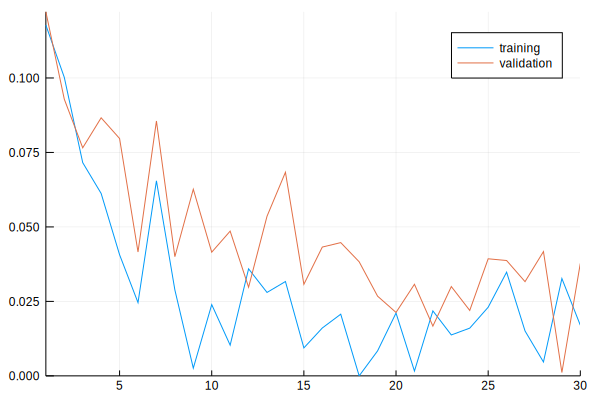

  2.592879 seconds (1.91 M allocations: 126.029 MiB, 2.97% gc time)


Progress:   1%|                                         |  ETA: 21:53:22

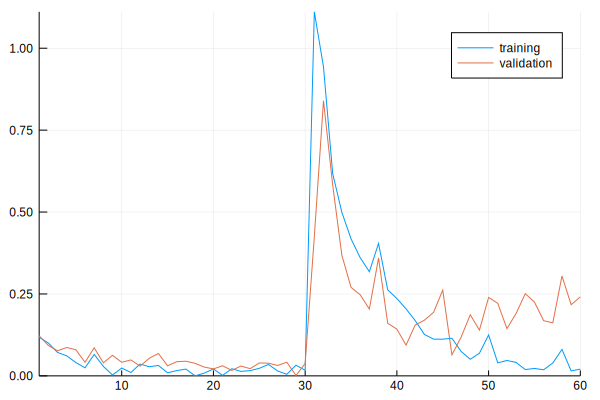

  1.510334 seconds (1.56 M allocations: 137.743 MiB, 2.56% gc time)


Progress:   2%|█                                        |  ETA: 19:47:20

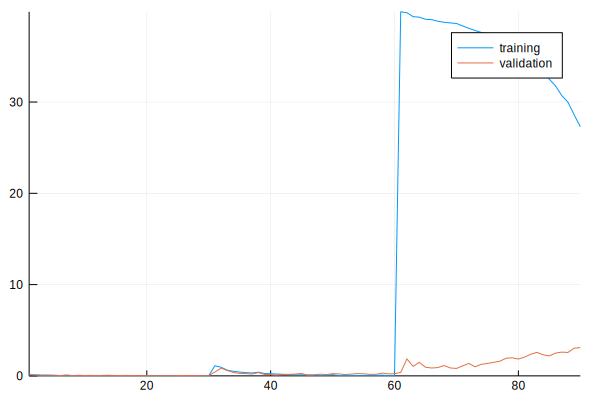

  1.805421 seconds (1.93 M allocations: 170.517 MiB, 2.51% gc time)


Progress:   3%|█                                        |  ETA: 16:50:23

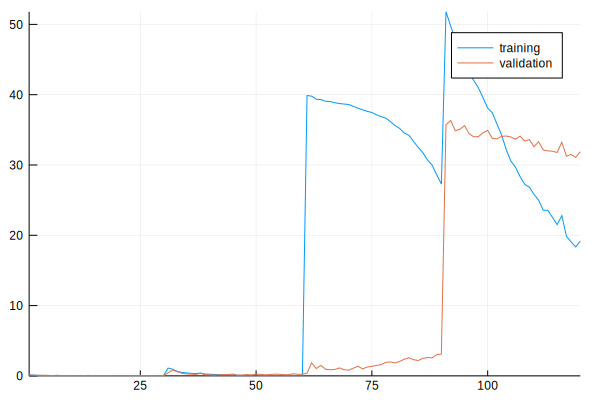

  2.525606 seconds (2.67 M allocations: 235.095 MiB, 2.50% gc time)


Progress:   4%|██                                       |  ETA: 16:29:09

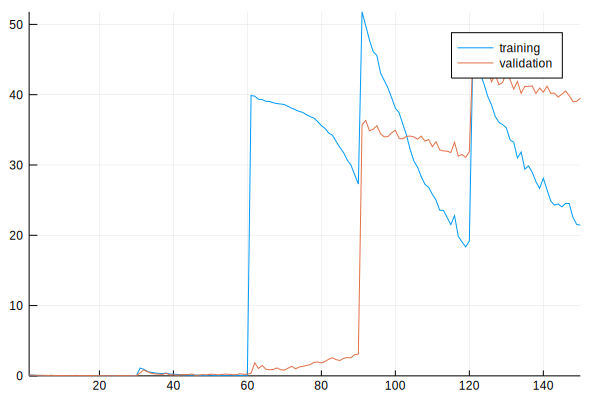

  3.121678 seconds (3.37 M allocations: 297.033 MiB, 3.27% gc time)


Progress:   5%|██                                       |  ETA: 16:04:56

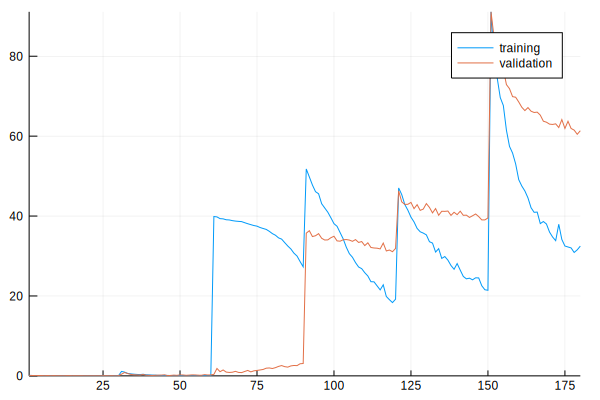

  3.709630 seconds (3.98 M allocations: 351.146 MiB, 2.52% gc time)


Progress:   6%|██                                       |  ETA: 15:37:37

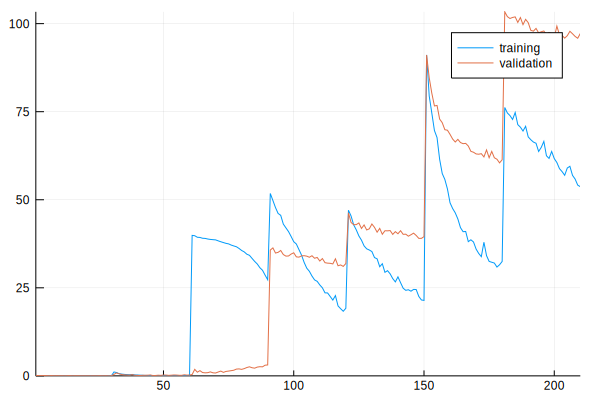

  4.086572 seconds (4.45 M allocations: 391.941 MiB, 2.38% gc time)


Progress:   7%|███                                      |  ETA: 14:30:33

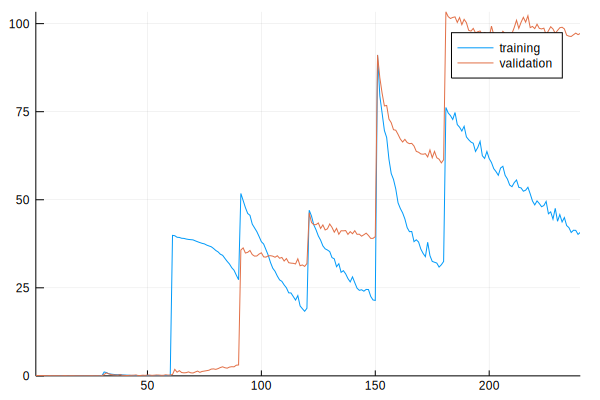

  4.430460 seconds (4.73 M allocations: 416.629 MiB, 3.72% gc time)


Progress:   8%|███                                      |  ETA: 13:36:07

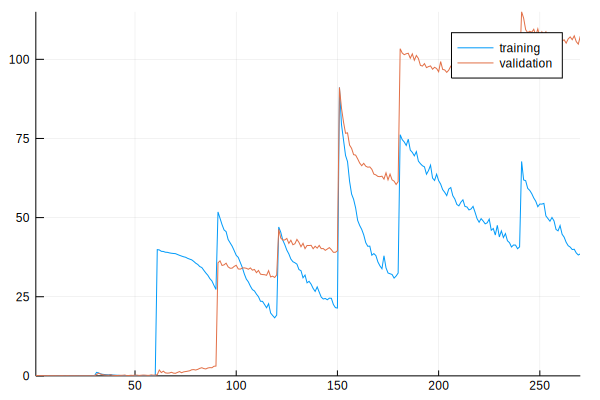

  4.916732 seconds (5.30 M allocations: 466.850 MiB, 3.76% gc time)


Progress:   9%|████                                     |  ETA: 13:06:54

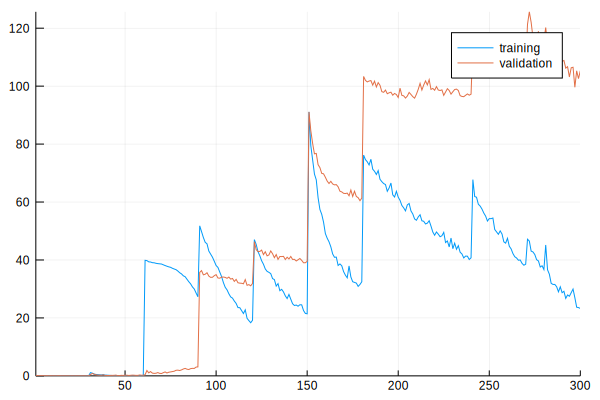

  5.564359 seconds (5.85 M allocations: 515.385 MiB, 3.98% gc time)


Progress:  10%|████                                     |  ETA: 12:45:54

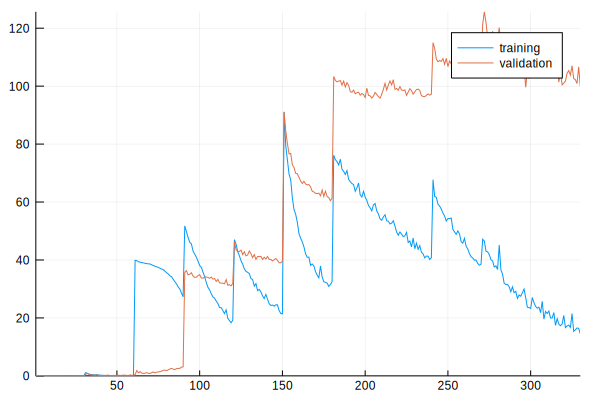

  5.415042 seconds (6.08 M allocations: 536.017 MiB, 2.93% gc time)


Progress:  11%|█████                                    |  ETA: 12:17:44

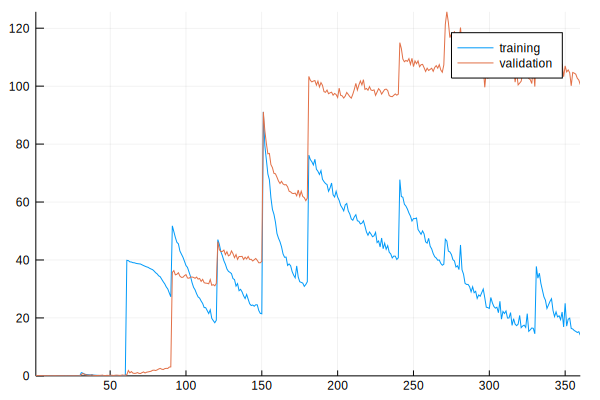

  5.865888 seconds (6.50 M allocations: 573.398 MiB, 2.80% gc time)


Progress:  12%|█████                                    |  ETA: 12:00:08

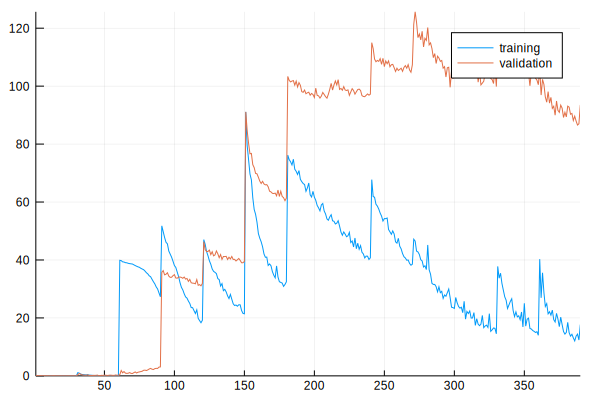

  6.376011 seconds (7.03 M allocations: 619.367 MiB, 2.97% gc time)


Progress:  13%|█████                                    |  ETA: 11:36:50

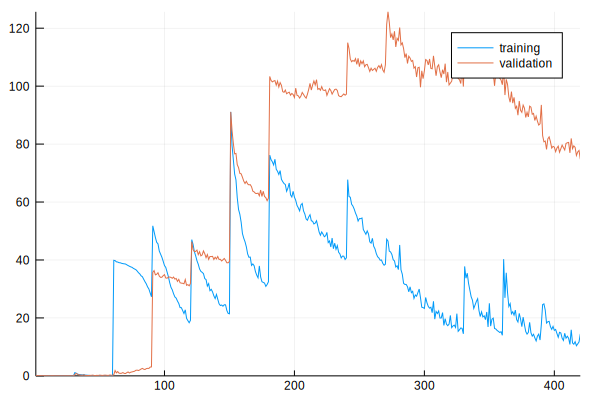

  7.053491 seconds (7.76 M allocations: 683.449 MiB, 3.40% gc time)


Progress:  14%|██████                                   |  ETA: 11:42:10

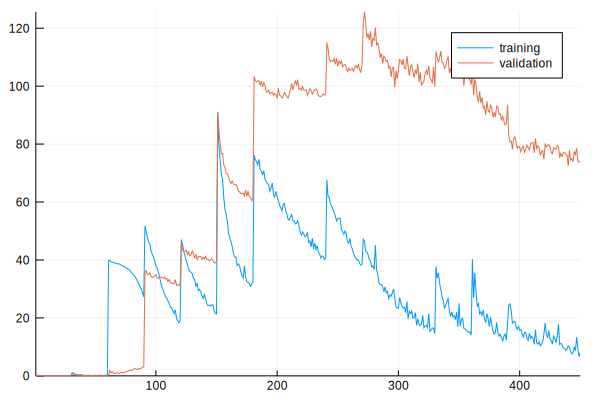

  7.218656 seconds (8.03 M allocations: 707.231 MiB, 2.63% gc time)


Progress:  15%|██████                                   |  ETA: 11:09:15

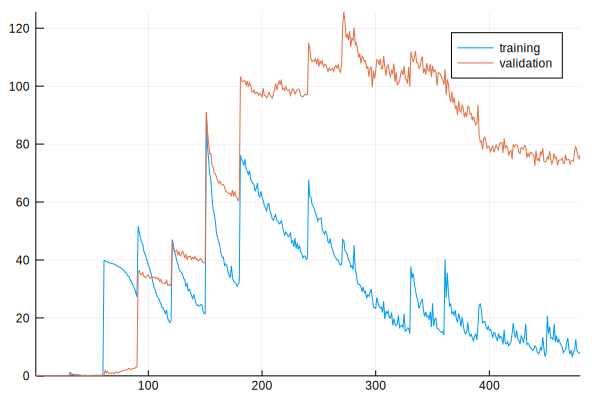

  8.017076 seconds (8.69 M allocations: 766.012 MiB, 3.88% gc time)


Progress:  16%|███████                                  |  ETA: 11:18:10

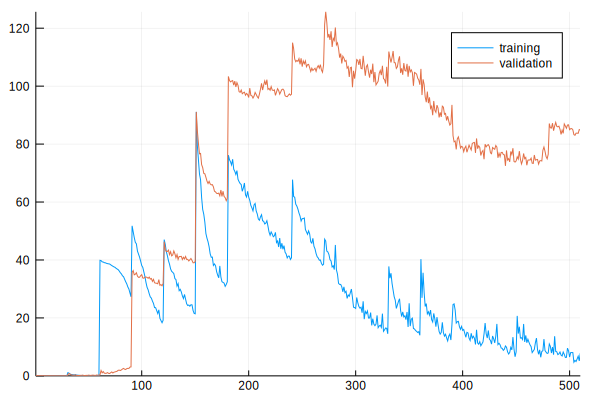

  8.276199 seconds (9.08 M allocations: 801.571 MiB, 3.52% gc time)


Progress:  17%|███████                                  |  ETA: 11:10:14

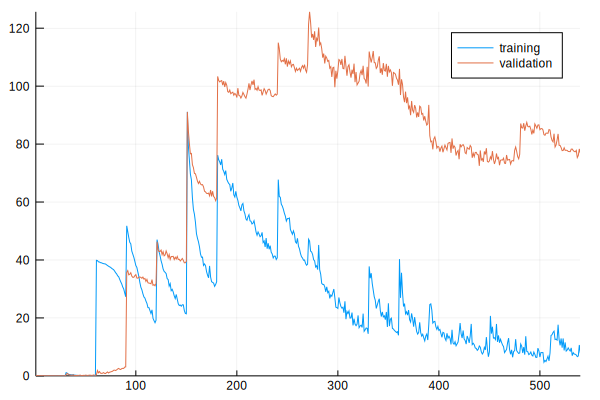

  8.787062 seconds (9.71 M allocations: 856.680 MiB, 3.23% gc time)


Progress:  18%|███████                                  |  ETA: 11:02:31

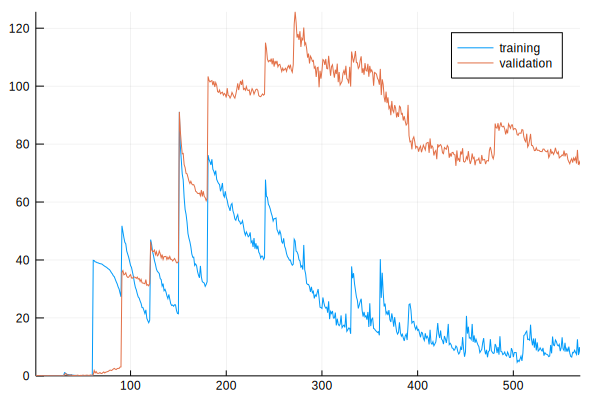

  9.310602 seconds (10.19 M allocations: 899.406 MiB, 3.79% gc time)


Progress:  19%|████████                                 |  ETA: 10:58:02

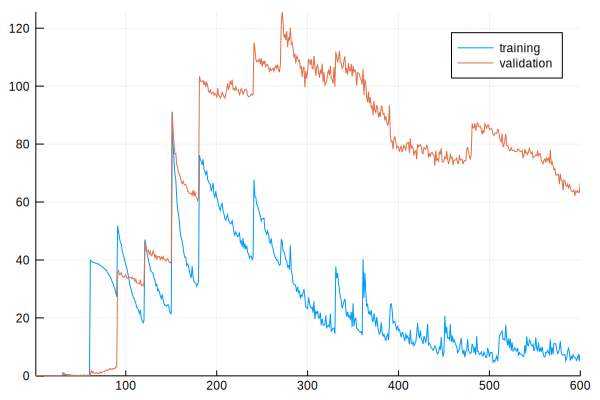

 10.008135 seconds (10.95 M allocations: 966.217 MiB, 3.79% gc time)


Progress:  20%|████████                                 |  ETA: 11:02:12

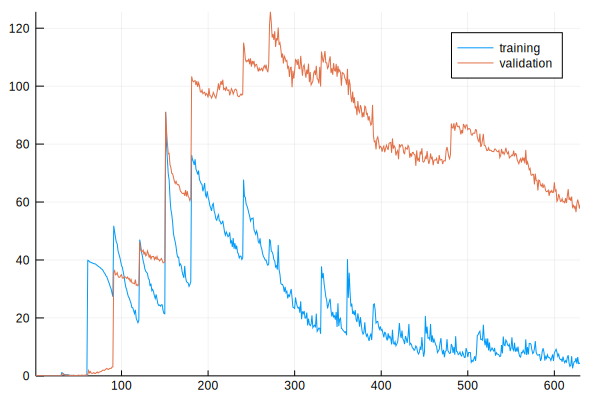

 10.181925 seconds (11.42 M allocations: 1007.921 MiB, 2.44% gc time)


Progress:  21%|█████████                                |  ETA: 10:45:54

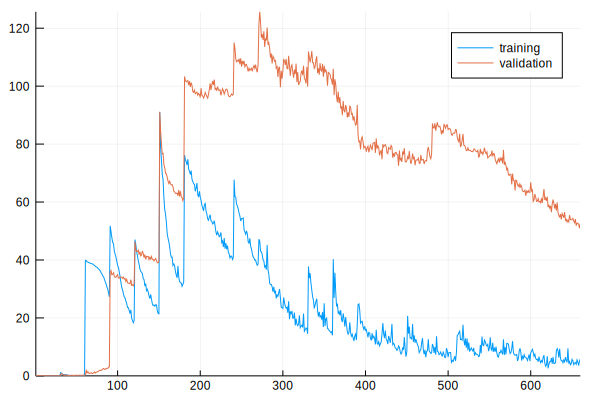

 10.983160 seconds (12.15 M allocations: 1.047 GiB, 3.25% gc time)


Progress:  22%|█████████                                |  ETA: 10:45:58

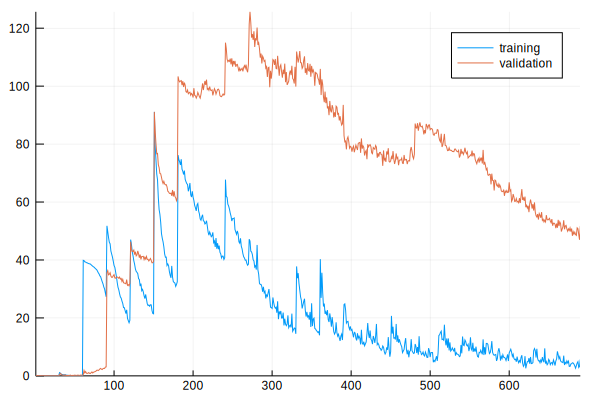

 11.693508 seconds (12.80 M allocations: 1.103 GiB, 3.78% gc time)


Progress:  23%|█████████                                |  ETA: 10:45:32

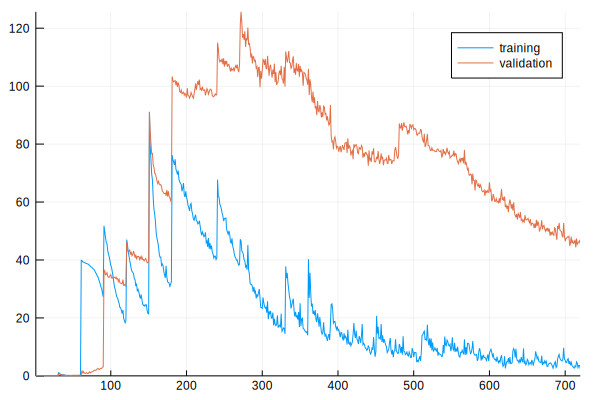

 12.211929 seconds (13.53 M allocations: 1.165 GiB, 3.05% gc time)


Progress:  24%|██████████                               |  ETA: 10:36:39

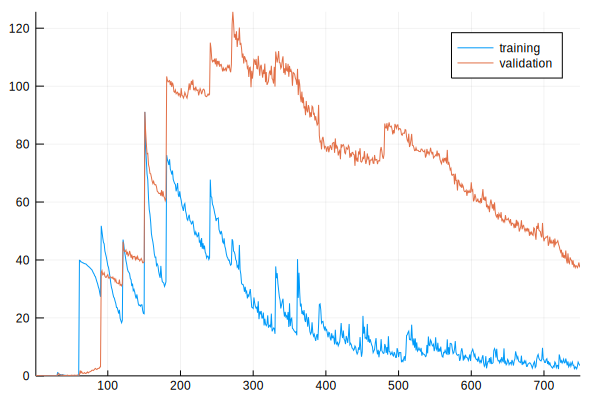

 13.167792 seconds (14.41 M allocations: 1.240 GiB, 3.46% gc time)


Progress:  25%|██████████                               |  ETA: 10:37:54

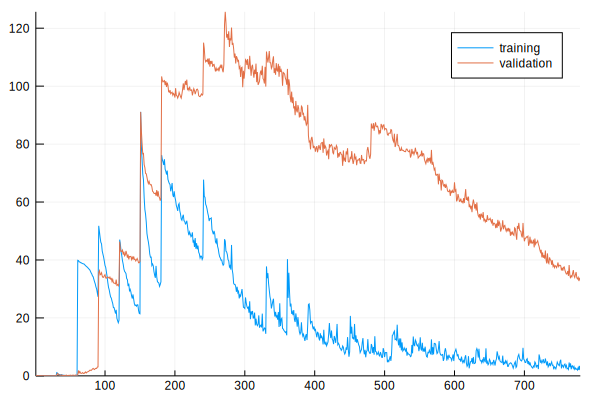

 13.580518 seconds (15.21 M allocations: 1.309 GiB, 2.46% gc time)


Progress:  26%|███████████                              |  ETA: 10:35:53

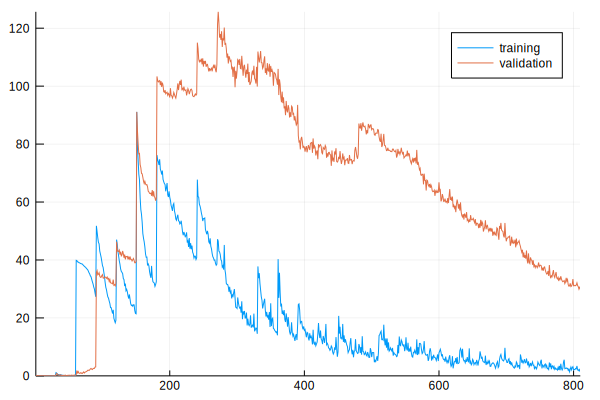

 14.188826 seconds (15.57 M allocations: 1.341 GiB, 3.48% gc time)


Progress:  27%|███████████                              |  ETA: 10:25:48

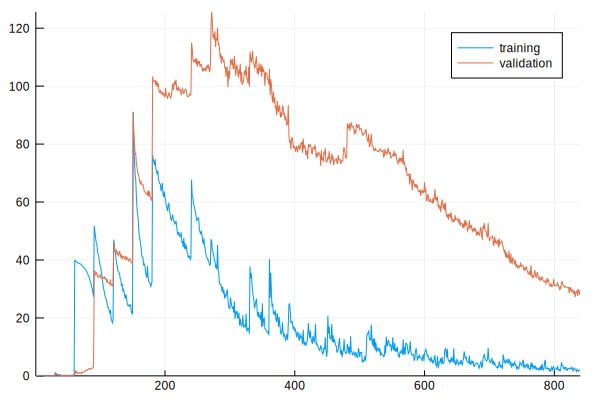

 15.255149 seconds (16.39 M allocations: 1.411 GiB, 3.95% gc time)


Progress:  28%|███████████                              |  ETA: 10:25:54

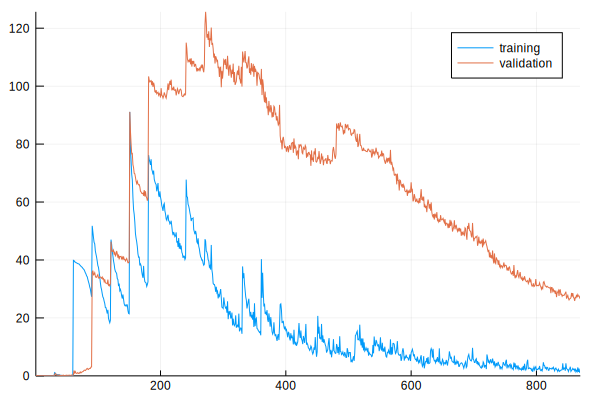

 15.443380 seconds (17.09 M allocations: 1.471 GiB, 2.75% gc time)


Progress:  29%|████████████                             |  ETA: 10:22:09

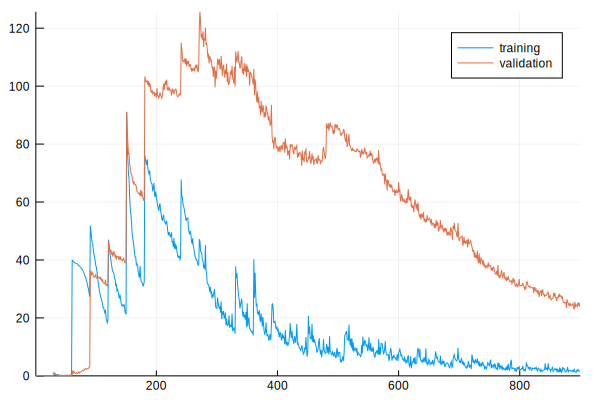

 16.406286 seconds (17.94 M allocations: 1.544 GiB, 3.88% gc time)


Progress:  30%|████████████                             |  ETA: 10:22:07

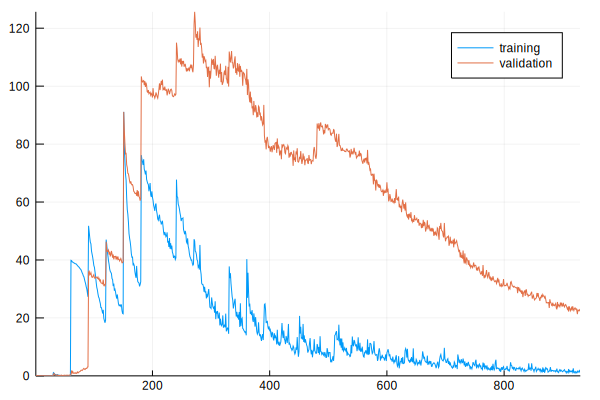

 16.798858 seconds (18.64 M allocations: 1.604 GiB, 2.83% gc time)


Progress:  31%|█████████████                            |  ETA: 10:15:11

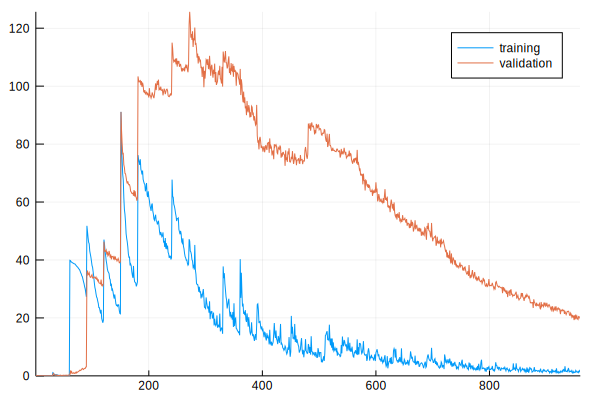

 17.830340 seconds (19.48 M allocations: 1.676 GiB, 3.05% gc time)


Progress:  32%|█████████████                            |  ETA: 10:12:26

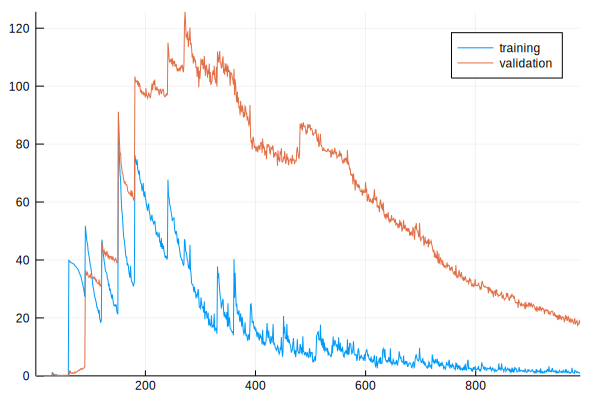

 18.557260 seconds (20.16 M allocations: 1.735 GiB, 3.74% gc time)


Progress:  33%|██████████████                           |  ETA: 10:07:12

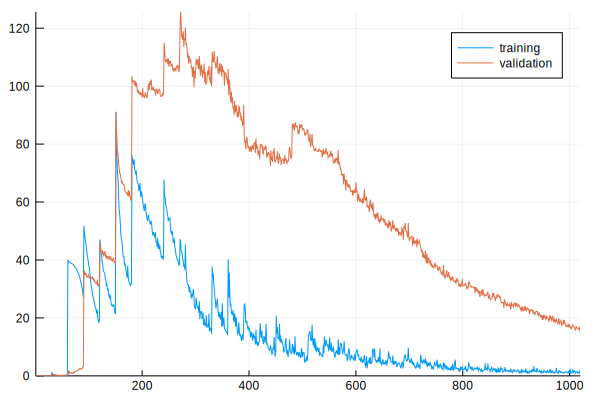

 19.224018 seconds (20.92 M allocations: 1.801 GiB, 3.97% gc time)


Progress:  34%|██████████████                           |  ETA: 10:03:53

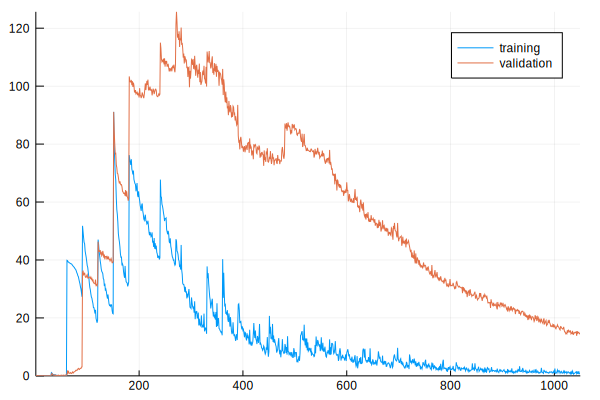

 19.712202 seconds (21.81 M allocations: 1.878 GiB, 3.03% gc time)


Progress:  35%|██████████████                           |  ETA: 10:03:01

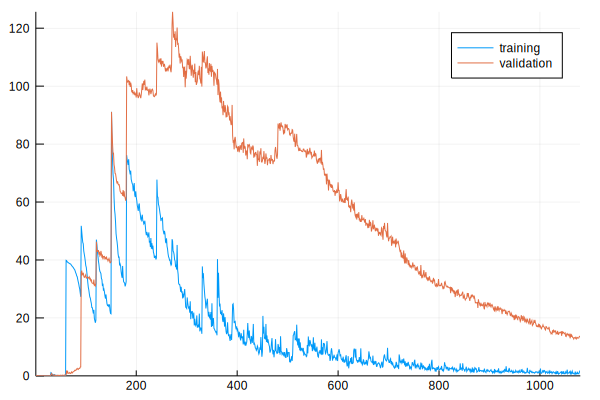

 20.249737 seconds (22.54 M allocations: 1.941 GiB, 2.82% gc time)


Progress:  36%|███████████████                          |  ETA: 9:57:32

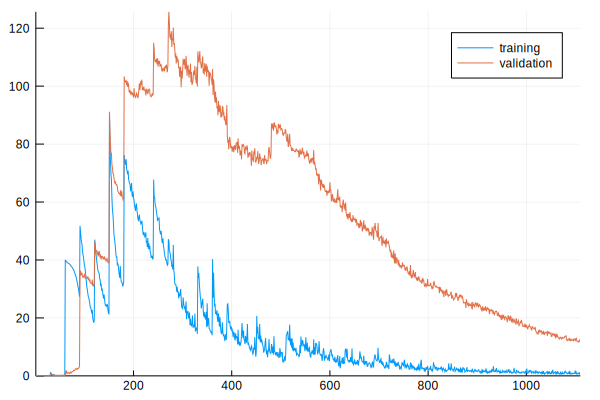

 21.482186 seconds (23.30 M allocations: 2.006 GiB, 3.90% gc time)


Progress:  37%|███████████████                          |  ETA: 9:51:32

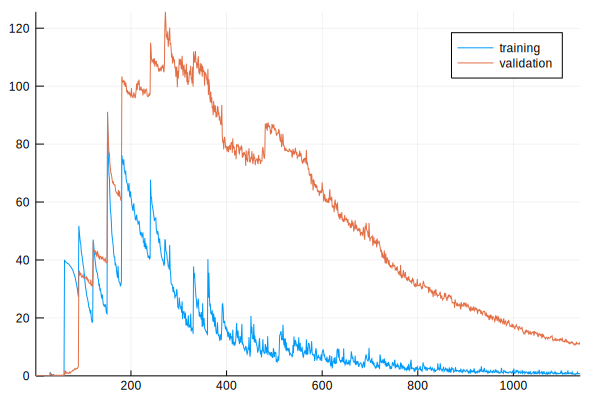

 21.604675 seconds (23.77 M allocations: 2.047 GiB, 3.06% gc time)


Progress:  38%|████████████████                         |  ETA: 9:40:24

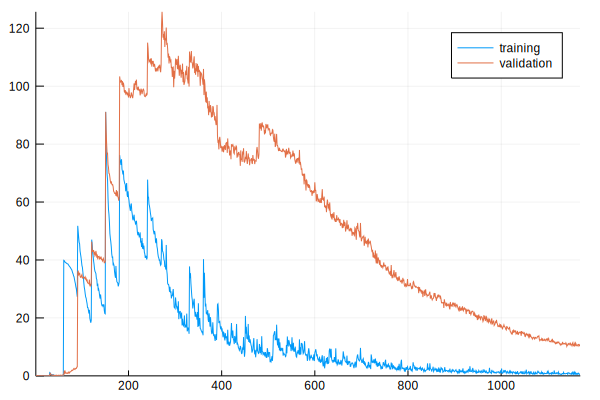

 22.312288 seconds (24.40 M allocations: 2.101 GiB, 3.13% gc time)


Progress:  39%|████████████████                         |  ETA: 9:30:34

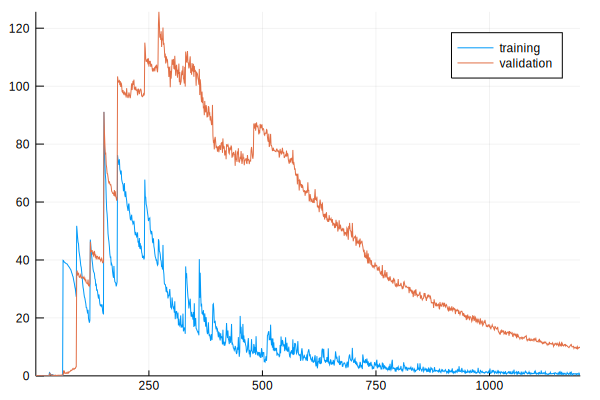

 23.233106 seconds (25.23 M allocations: 2.173 GiB, 3.81% gc time)


Progress:  40%|████████████████                         |  ETA: 9:25:21

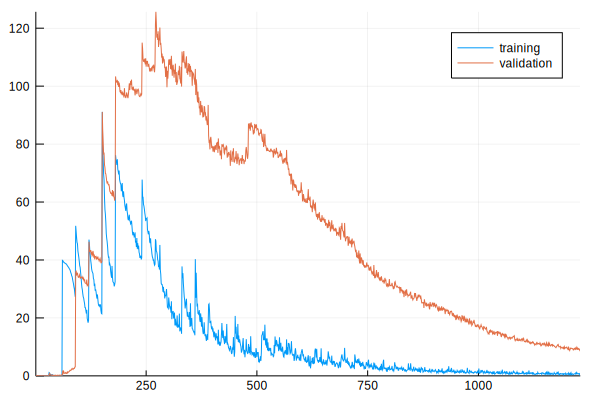

 23.264783 seconds (25.83 M allocations: 2.225 GiB, 2.77% gc time)


Progress:  41%|█████████████████                        |  ETA: 9:16:28

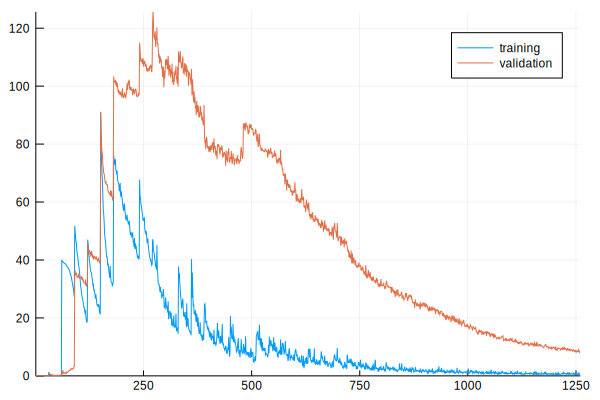

 23.992016 seconds (26.23 M allocations: 2.259 GiB, 2.87% gc time)


Progress:  42%|█████████████████                        |  ETA: 9:04:17

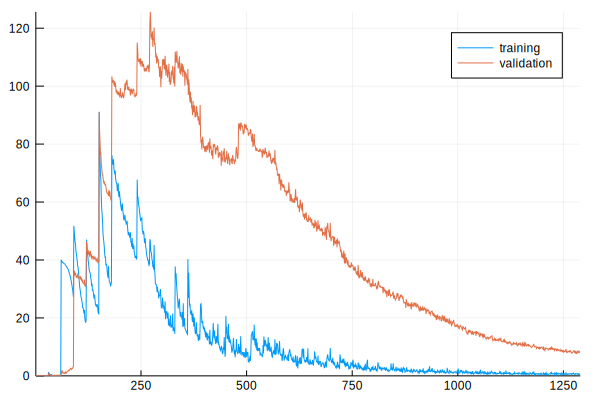

 24.351911 seconds (26.71 M allocations: 2.301 GiB, 3.66% gc time)


Progress:  43%|██████████████████                       |  ETA: 8:55:15

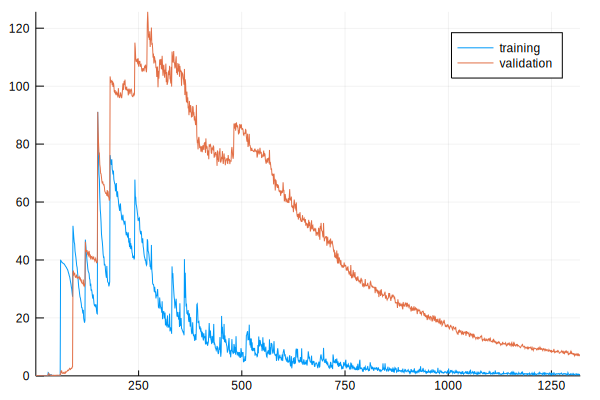

 24.746123 seconds (27.39 M allocations: 2.360 GiB, 3.24% gc time)


Progress:  44%|██████████████████                       |  ETA: 8:48:21

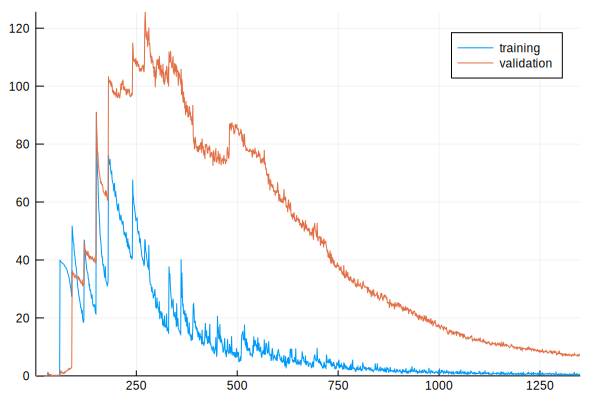

 25.223842 seconds (28.15 M allocations: 2.425 GiB, 2.63% gc time)


Progress:  45%|██████████████████                       |  ETA: 8:41:12

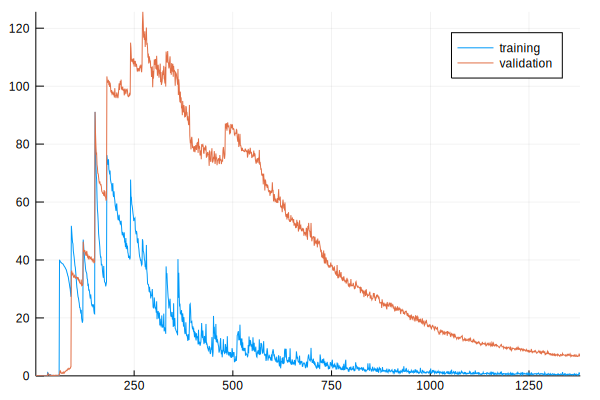

 25.935430 seconds (28.65 M allocations: 2.468 GiB, 3.07% gc time)


Progress:  46%|███████████████████                      |  ETA: 8:31:38

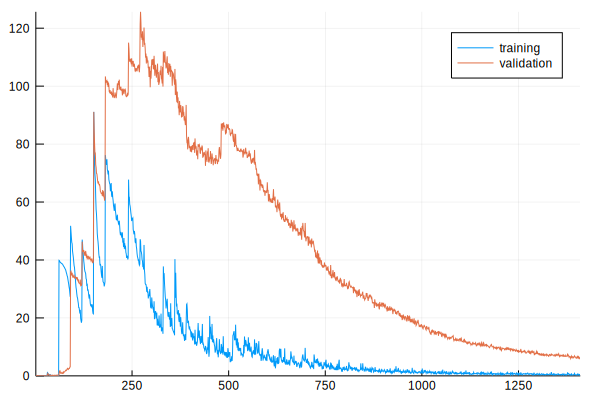

 26.638058 seconds (29.43 M allocations: 2.536 GiB, 3.27% gc time)


Progress:  47%|███████████████████                      |  ETA: 8:24:46

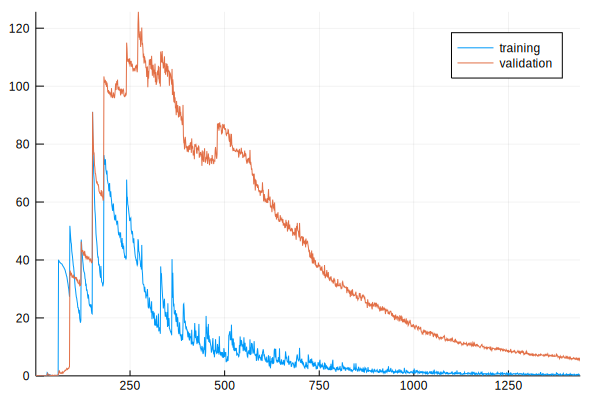

 27.473562 seconds (30.05 M allocations: 2.590 GiB, 3.49% gc time)


Progress:  48%|████████████████████                     |  ETA: 8:16:37

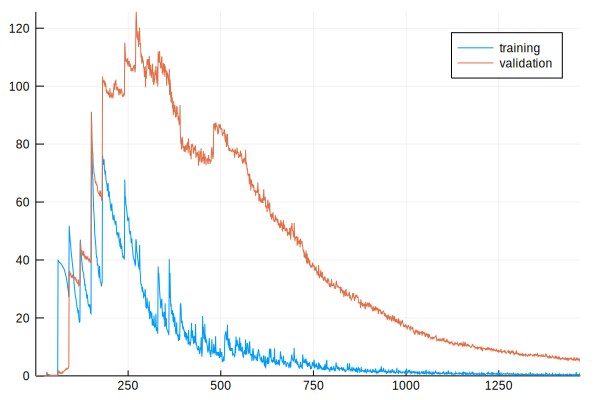

 27.813944 seconds (30.81 M allocations: 2.655 GiB, 2.84% gc time)


Progress:  49%|████████████████████                     |  ETA: 8:09:17

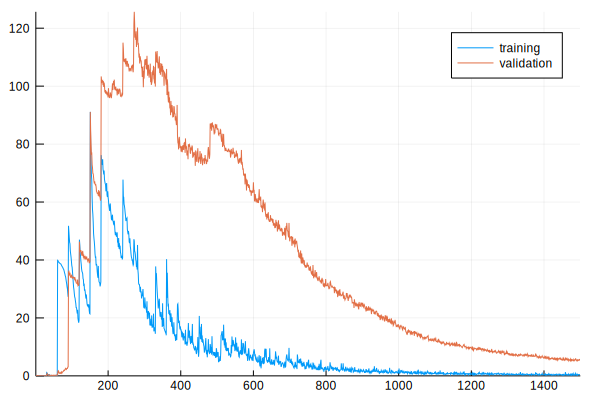

 28.559447 seconds (31.52 M allocations: 2.716 GiB, 2.89% gc time)


Progress:  50%|████████████████████                     |  ETA: 8:00:38

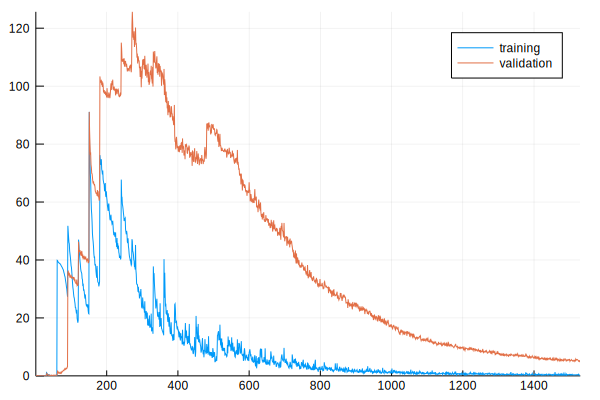

 29.332602 seconds (32.25 M allocations: 2.779 GiB, 3.67% gc time)


Progress:  51%|█████████████████████                    |  ETA: 7:51:33

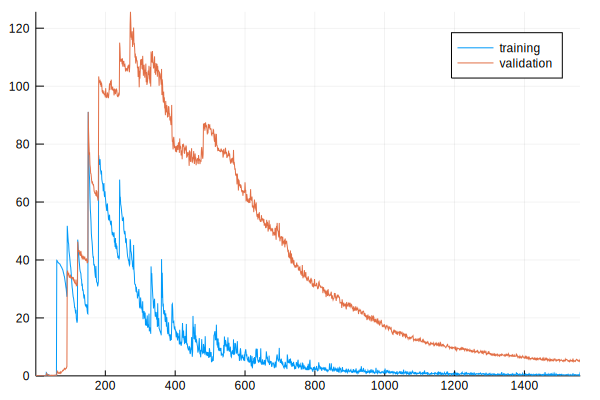

 29.869874 seconds (33.03 M allocations: 2.846 GiB, 3.05% gc time)


Progress:  52%|█████████████████████                    |  ETA: 7:43:13

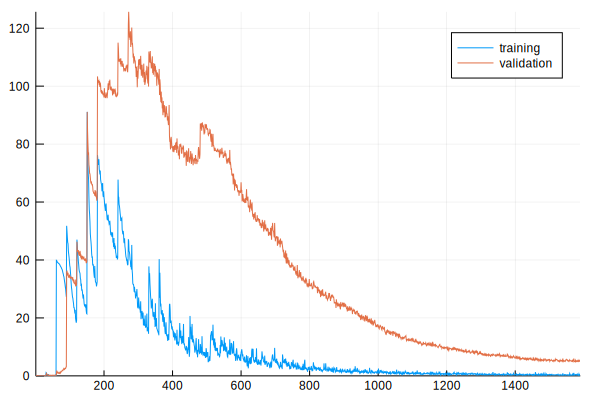

 30.757482 seconds (33.84 M allocations: 2.915 GiB, 3.26% gc time)


Progress:  53%|██████████████████████                   |  ETA: 7:34:26

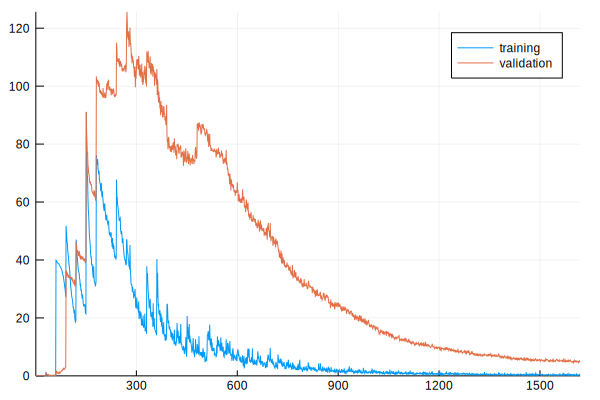

 31.571903 seconds (34.66 M allocations: 2.986 GiB, 3.29% gc time)


Progress:  54%|██████████████████████                   |  ETA: 7:26:53

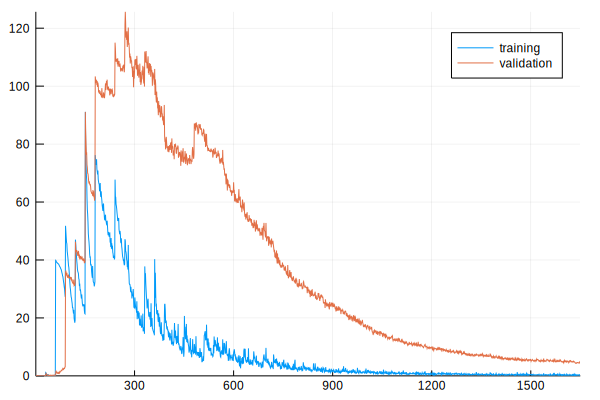

 32.241095 seconds (35.49 M allocations: 3.058 GiB, 3.11% gc time)


Progress:  55%|███████████████████████                  |  ETA: 7:18:49

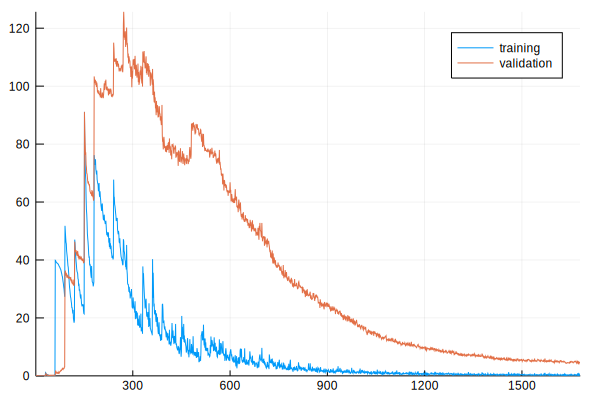

 32.934006 seconds (36.07 M allocations: 3.107 GiB, 3.19% gc time)


Progress:  56%|███████████████████████                  |  ETA: 7:08:37

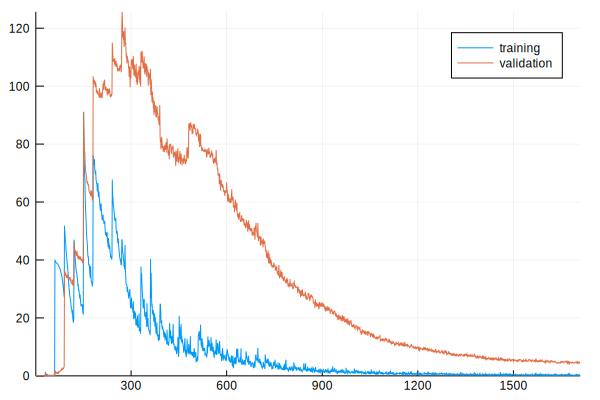

 33.902135 seconds (36.94 M allocations: 3.182 GiB, 3.92% gc time)


Progress:  57%|███████████████████████                  |  ETA: 7:00:59

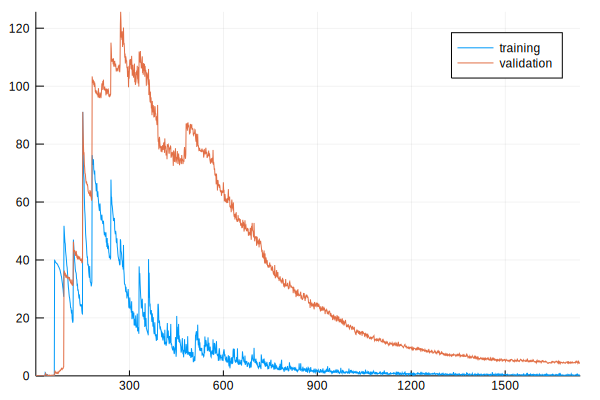

 34.174476 seconds (37.50 M allocations: 3.230 GiB, 3.28% gc time)


Progress:  58%|████████████████████████                 |  ETA: 6:51:12

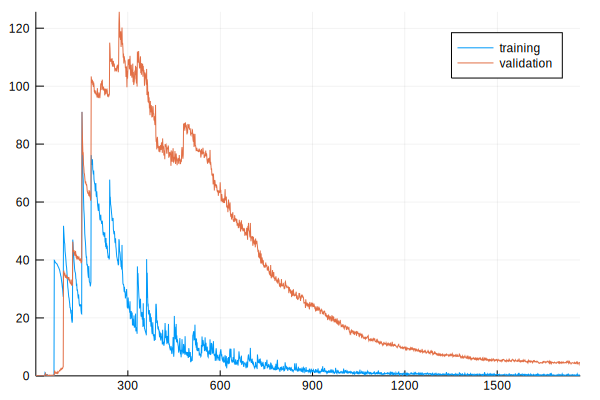

 35.198298 seconds (38.26 M allocations: 3.296 GiB, 3.82% gc time)


Progress:  59%|████████████████████████                 |  ETA: 6:43:17

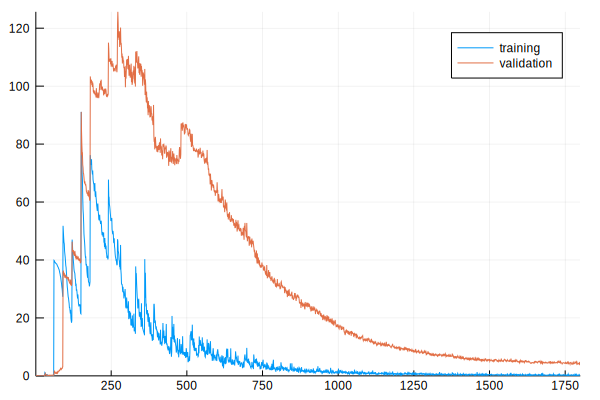

 35.404656 seconds (39.11 M allocations: 3.369 GiB, 3.07% gc time)


Progress:  60%|█████████████████████████                |  ETA: 6:35:31

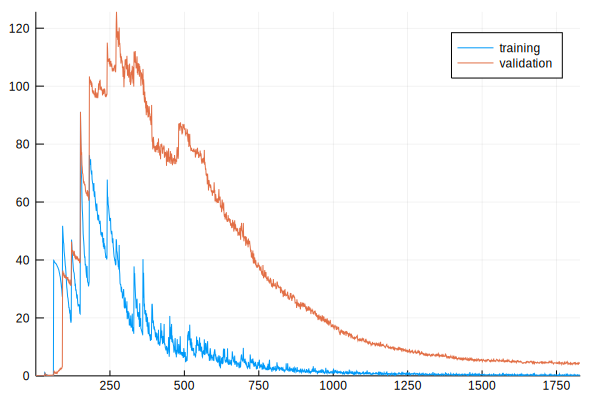

 36.679960 seconds (39.90 M allocations: 3.437 GiB, 3.87% gc time)


Progress:  61%|█████████████████████████                |  ETA: 6:27:15

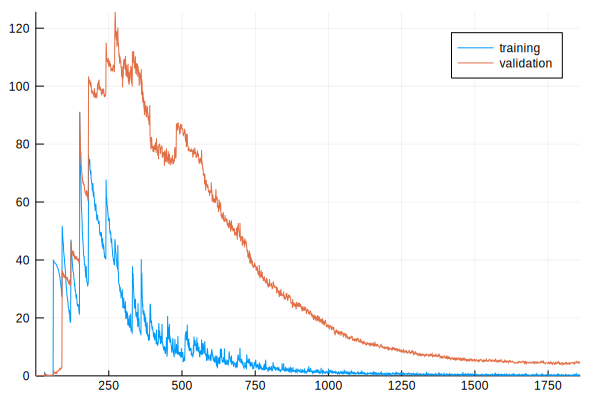

 36.998765 seconds (40.35 M allocations: 3.475 GiB, 3.85% gc time)


Progress:  62%|█████████████████████████                |  ETA: 6:16:56

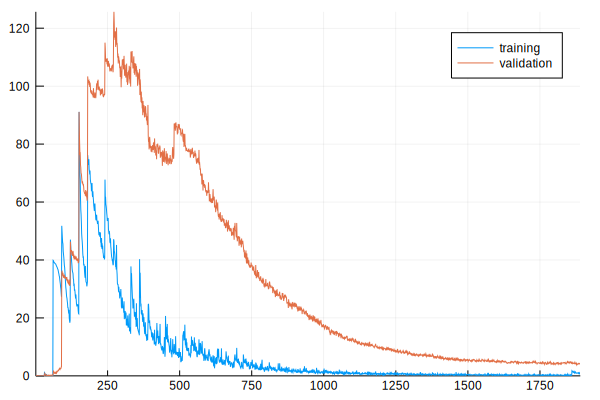

 37.042069 seconds (40.81 M allocations: 3.515 GiB, 3.09% gc time)


Progress:  63%|██████████████████████████               |  ETA: 6:06:18

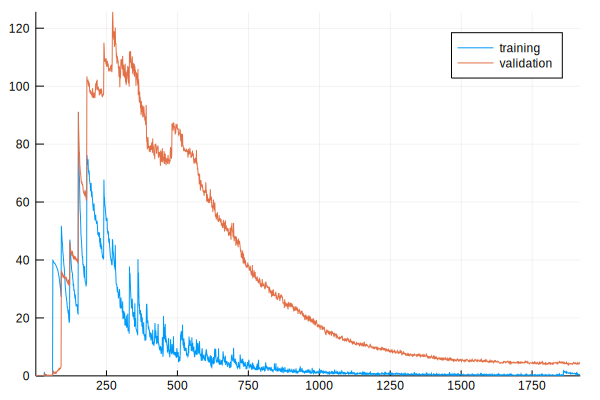

 37.413057 seconds (41.49 M allocations: 3.574 GiB, 2.74% gc time)


Progress:  64%|██████████████████████████               |  ETA: 5:57:27

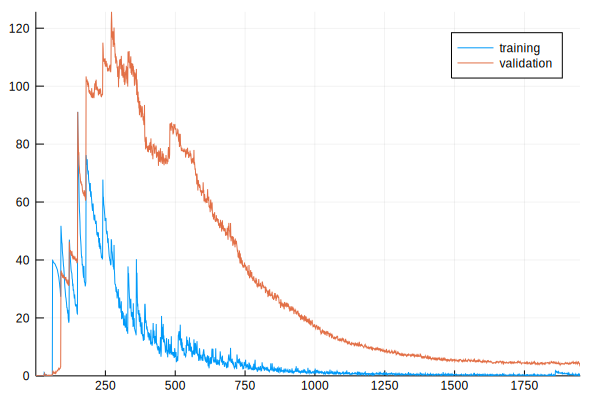

 38.319142 seconds (42.11 M allocations: 3.628 GiB, 3.29% gc time)


Progress:  65%|███████████████████████████              |  ETA: 5:47:30

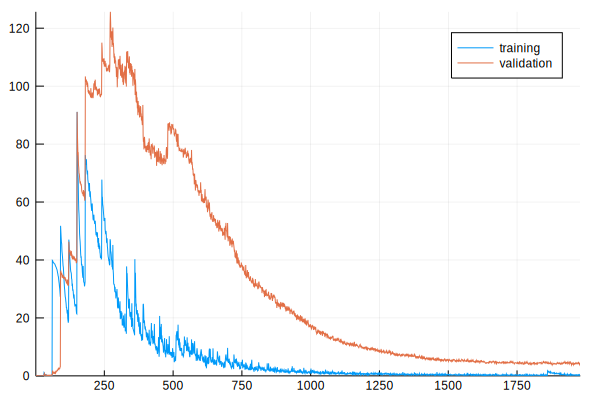

 38.960715 seconds (42.93 M allocations: 3.698 GiB, 2.60% gc time)


Progress:  66%|███████████████████████████              |  ETA: 5:39:03

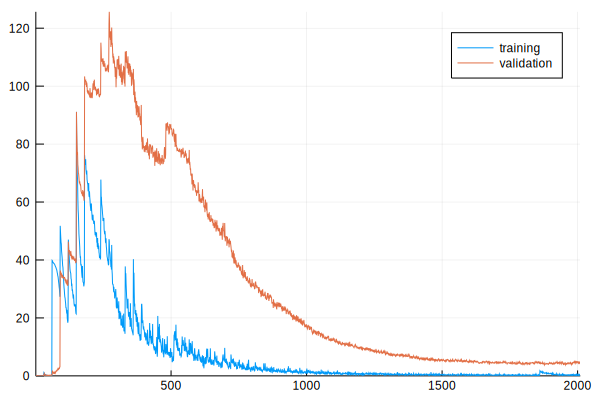

 39.740973 seconds (43.40 M allocations: 3.739 GiB, 3.86% gc time)


Progress:  67%|███████████████████████████              |  ETA: 5:28:28

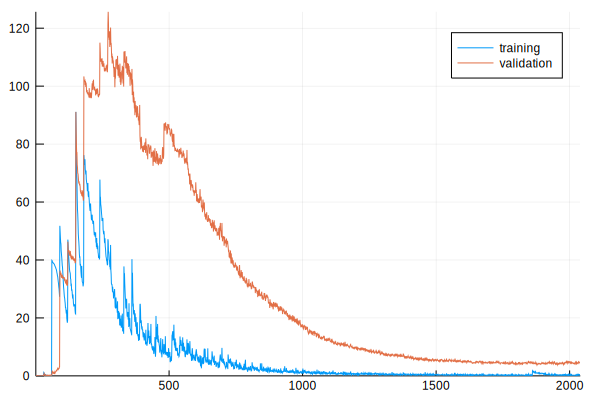

 39.677170 seconds (44.01 M allocations: 3.792 GiB, 2.93% gc time)


Progress:  68%|████████████████████████████             |  ETA: 5:18:31

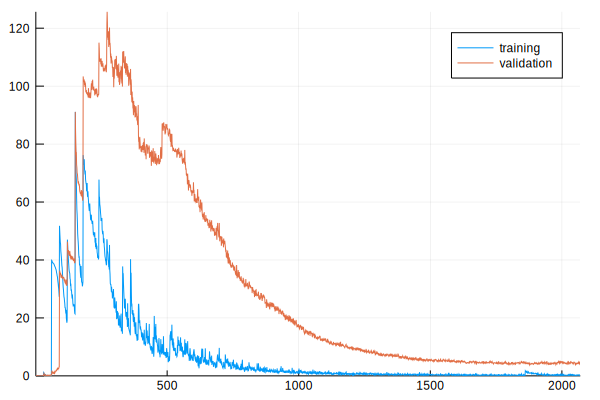

 40.766863 seconds (44.41 M allocations: 3.826 GiB, 3.53% gc time)


Progress:  69%|████████████████████████████             |  ETA: 5:07:53

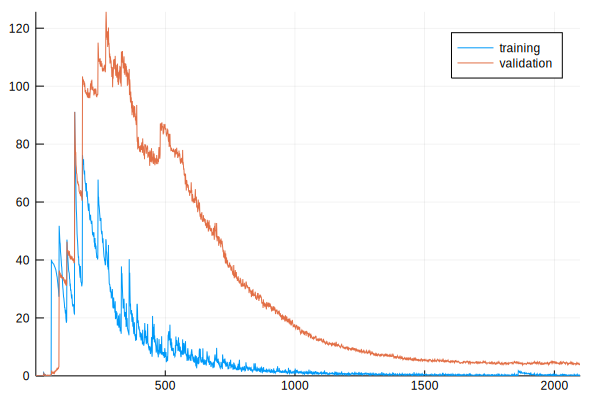

 40.899165 seconds (45.36 M allocations: 3.907 GiB, 2.65% gc time)


Progress:  70%|█████████████████████████████            |  ETA: 4:59:11

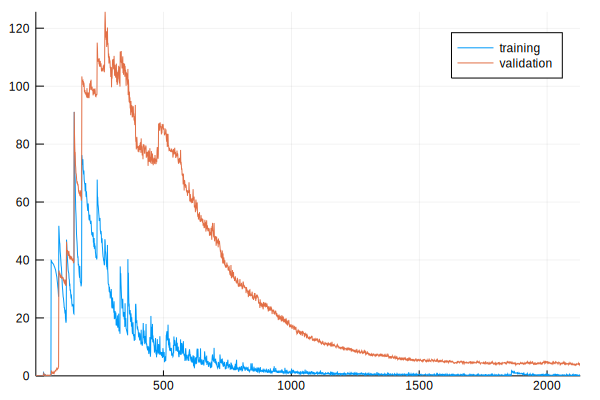

 41.509337 seconds (46.09 M allocations: 3.970 GiB, 2.50% gc time)


Progress:  71%|█████████████████████████████            |  ETA: 4:49:26

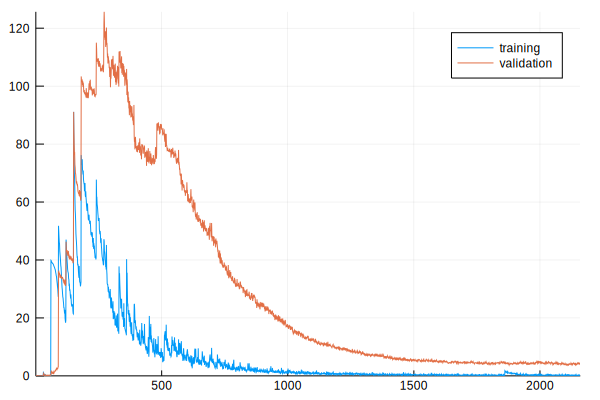

 42.204624 seconds (46.50 M allocations: 4.006 GiB, 3.55% gc time)


Progress:  72%|██████████████████████████████           |  ETA: 4:38:38

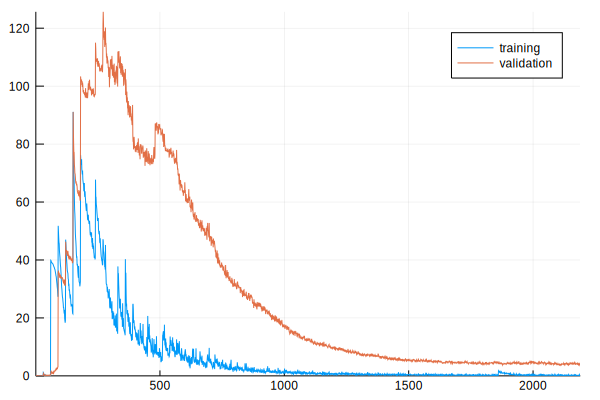

 42.990531 seconds (47.18 M allocations: 4.065 GiB, 3.10% gc time)


Progress:  73%|██████████████████████████████           |  ETA: 4:29:14

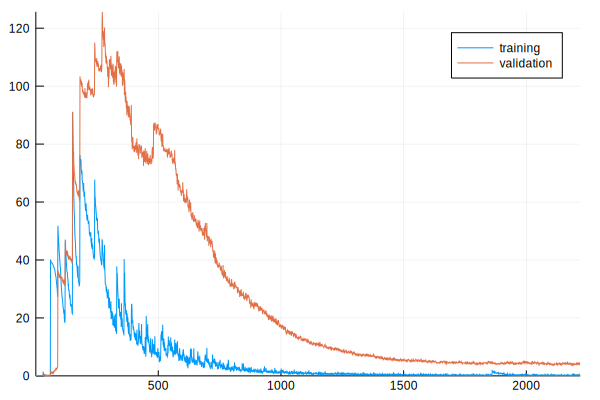

 43.267711 seconds (47.88 M allocations: 4.125 GiB, 2.91% gc time)


Progress:  74%|██████████████████████████████           |  ETA: 4:19:35

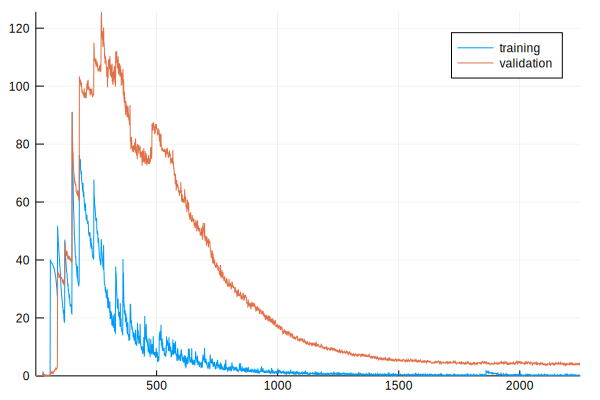

 44.785905 seconds (48.52 M allocations: 4.181 GiB, 3.85% gc time)


Progress:  75%|███████████████████████████████          |  ETA: 4:09:45

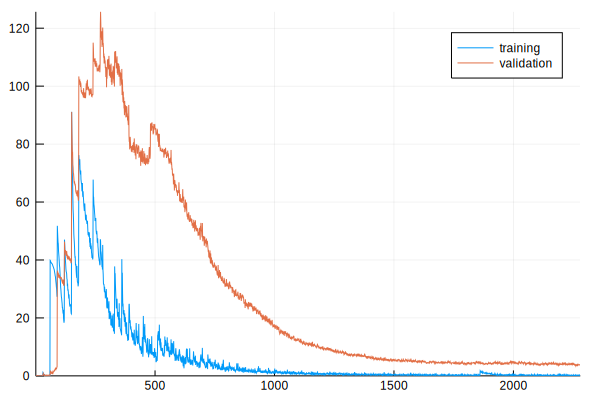

 44.599805 seconds (49.23 M allocations: 4.241 GiB, 3.13% gc time)


Progress:  76%|███████████████████████████████          |  ETA: 4:00:16

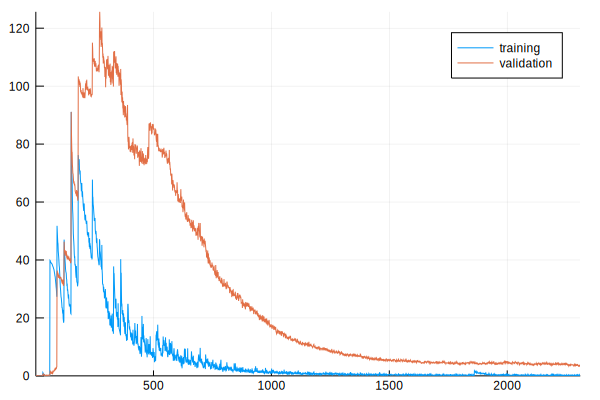

 45.546039 seconds (49.59 M allocations: 4.272 GiB, 3.93% gc time)


Progress:  77%|████████████████████████████████         |  ETA: 3:49:51

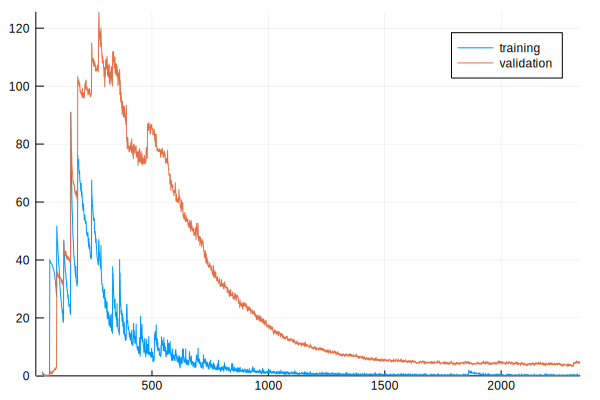

 45.647345 seconds (50.26 M allocations: 4.330 GiB, 3.30% gc time)


Progress:  78%|████████████████████████████████         |  ETA: 3:39:59

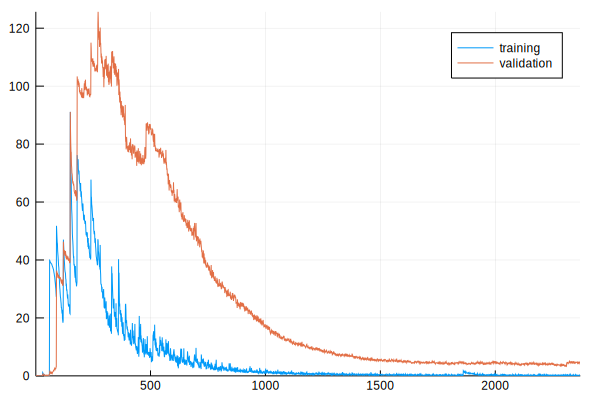

 46.167407 seconds (50.94 M allocations: 4.388 GiB, 2.89% gc time)


Progress:  79%|████████████████████████████████         |  ETA: 3:30:06

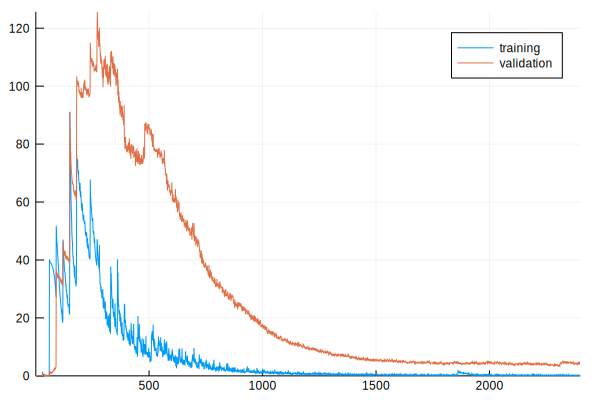

 46.977634 seconds (51.70 M allocations: 4.453 GiB, 3.33% gc time)


Progress:  80%|█████████████████████████████████        |  ETA: 3:20:22

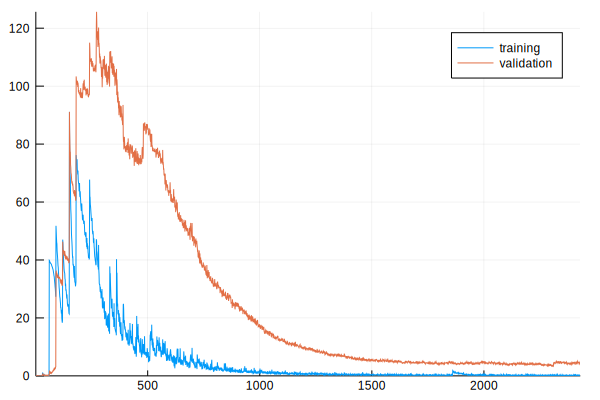

 47.338254 seconds (52.44 M allocations: 4.517 GiB, 2.67% gc time)


Progress:  81%|█████████████████████████████████        |  ETA: 3:10:27

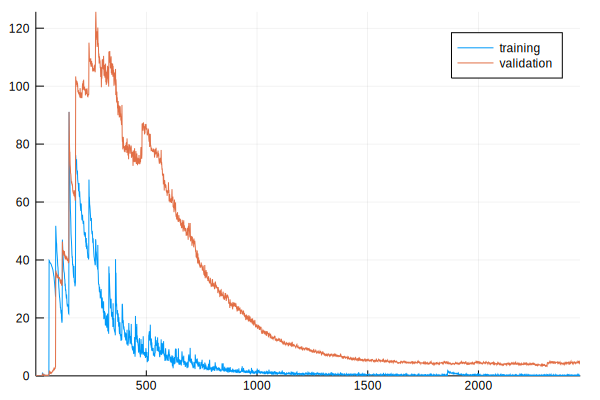

 48.487814 seconds (53.05 M allocations: 4.570 GiB, 3.28% gc time)


Progress:  82%|██████████████████████████████████       |  ETA: 3:00:29

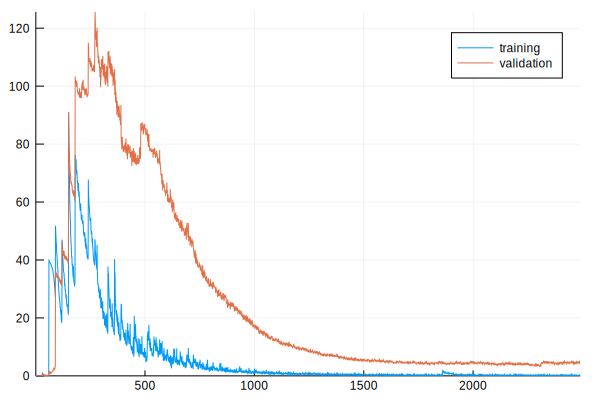

 48.384414 seconds (53.74 M allocations: 4.629 GiB, 2.50% gc time)


Progress:  83%|██████████████████████████████████       |  ETA: 2:50:45

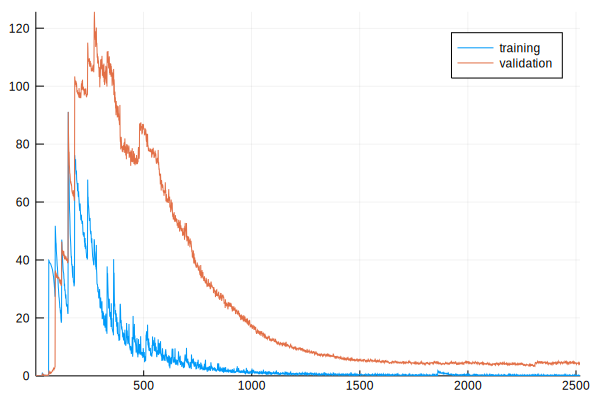

 49.275386 seconds (54.47 M allocations: 4.691 GiB, 2.63% gc time)


Progress:  84%|██████████████████████████████████       |  ETA: 2:41:11

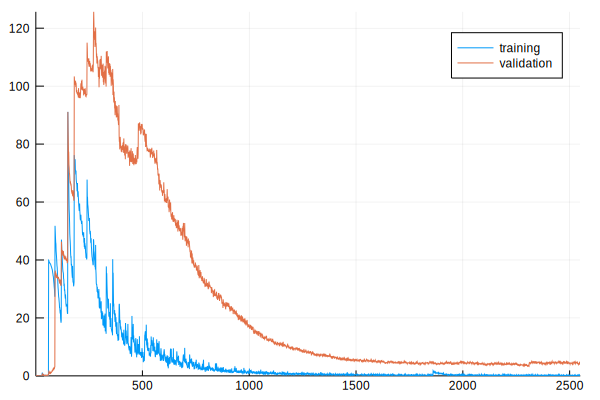

 49.861442 seconds (55.19 M allocations: 4.754 GiB, 3.06% gc time)


Progress:  85%|███████████████████████████████████      |  ETA: 2:31:28

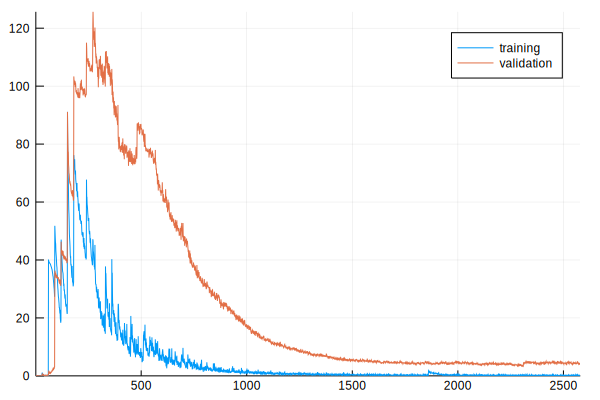

 51.263917 seconds (56.04 M allocations: 4.827 GiB, 2.92% gc time)


Progress:  86%|███████████████████████████████████      |  ETA: 2:21:48

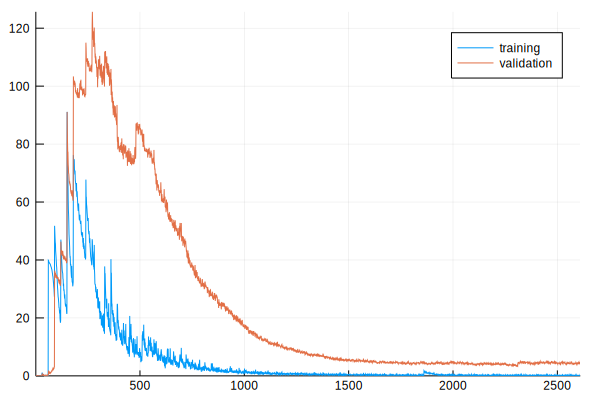

 50.990593 seconds (56.64 M allocations: 4.878 GiB, 2.77% gc time)


Progress:  87%|████████████████████████████████████     |  ETA: 2:11:47

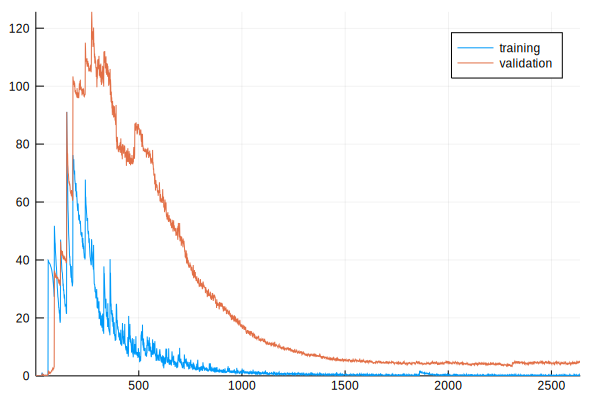

 51.689532 seconds (57.31 M allocations: 4.936 GiB, 2.51% gc time)


Progress:  88%|████████████████████████████████████     |  ETA: 2:01:42

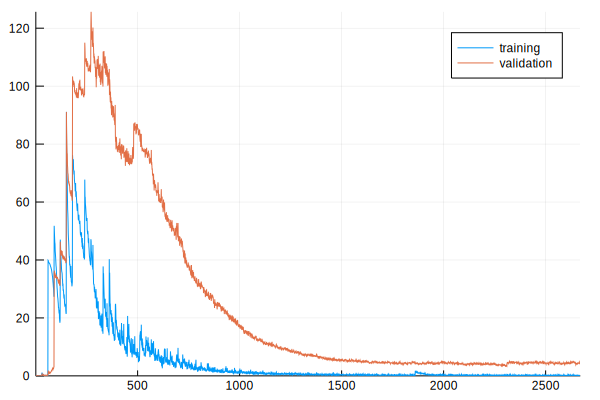

 52.547126 seconds (57.95 M allocations: 4.992 GiB, 2.92% gc time)


Progress:  89%|████████████████████████████████████     |  ETA: 1:51:41

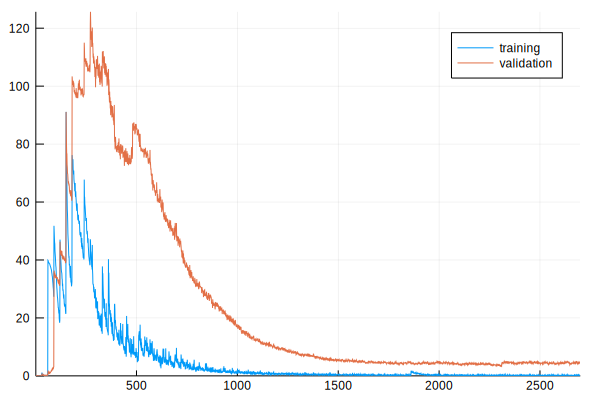

 53.239851 seconds (58.47 M allocations: 5.036 GiB, 3.22% gc time)


Progress:  90%|█████████████████████████████████████    |  ETA: 1:41:28

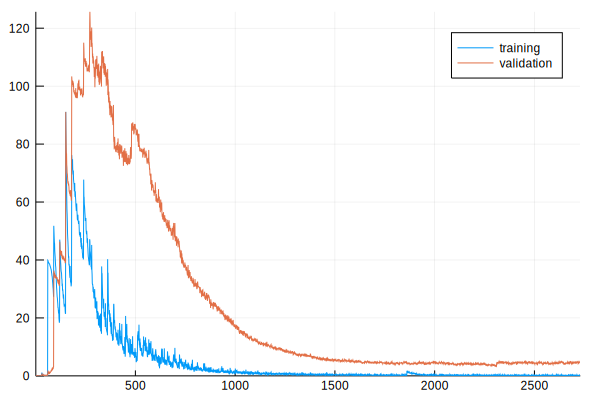

 53.451121 seconds (59.27 M allocations: 5.105 GiB, 2.79% gc time)


Progress:  91%|█████████████████████████████████████    |  ETA: 1:31:30

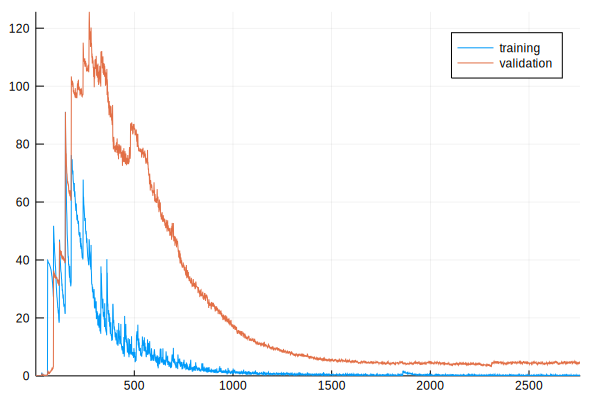

 54.681381 seconds (60.02 M allocations: 5.170 GiB, 3.55% gc time)


Progress:  92%|██████████████████████████████████████   |  ETA: 1:21:27

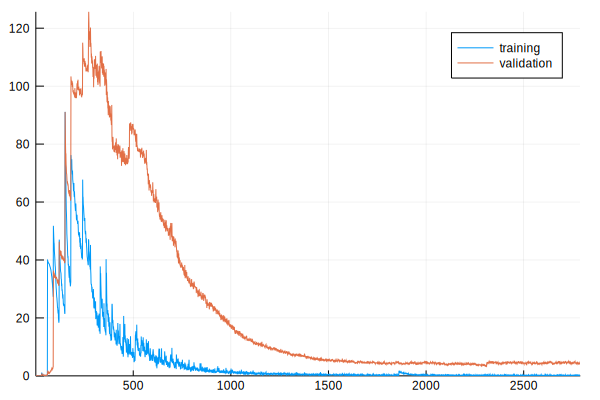

 54.437963 seconds (60.42 M allocations: 5.205 GiB, 2.94% gc time)


Progress:  93%|██████████████████████████████████████   |  ETA: 1:11:09

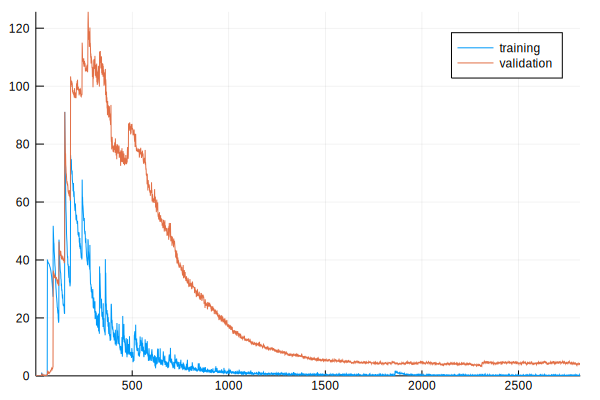

 55.580199 seconds (61.14 M allocations: 5.267 GiB, 3.17% gc time)


Progress:  94%|███████████████████████████████████████  |  ETA: 1:01:06

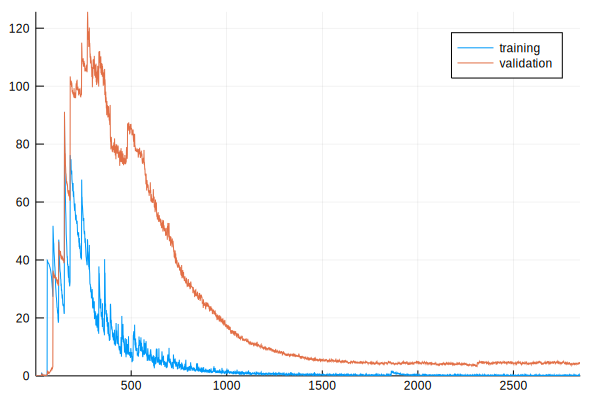

 56.150112 seconds (61.46 M allocations: 5.294 GiB, 3.32% gc time)


Progress:  95%|███████████████████████████████████████  |  ETA: 0:50:49

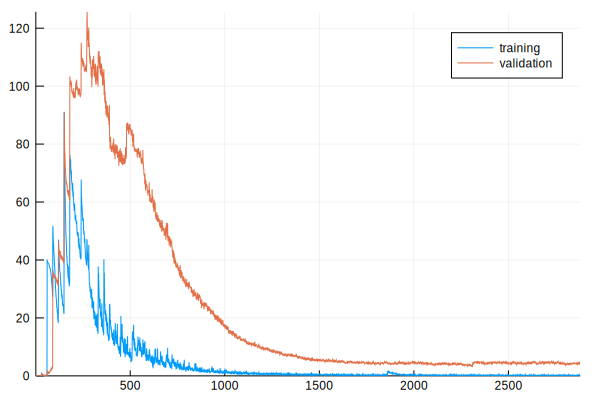

 56.066264 seconds (62.13 M allocations: 5.352 GiB, 3.15% gc time)


Progress:  96%|███████████████████████████████████████  |  ETA: 0:40:41

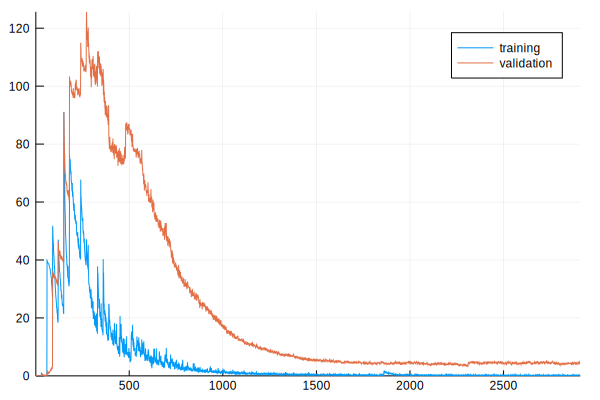

 56.896945 seconds (62.83 M allocations: 5.413 GiB, 3.19% gc time)


Progress:  97%|████████████████████████████████████████ |  ETA: 0:30:33

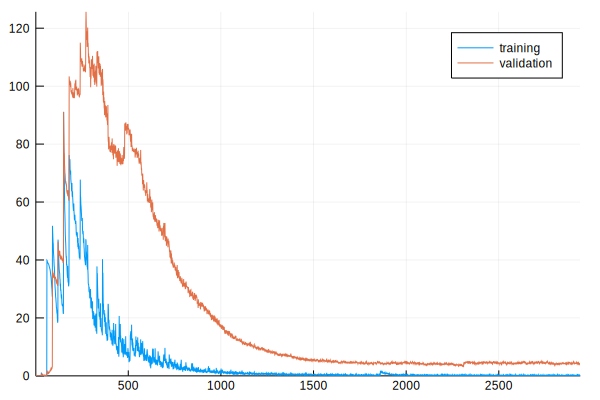

 60.127466 seconds (63.52 M allocations: 5.472 GiB, 3.65% gc time)


Progress:  98%|████████████████████████████████████████ |  ETA: 0:20:23

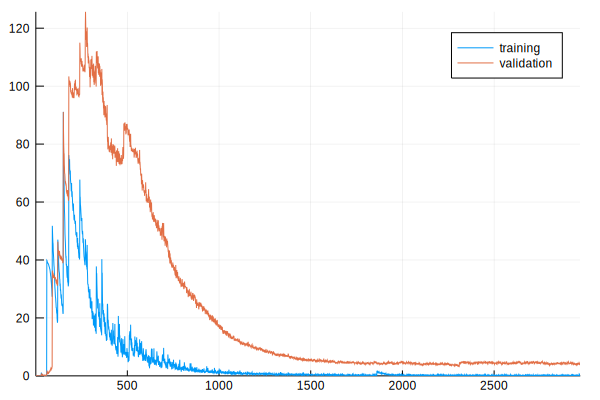

 59.341706 seconds (64.24 M allocations: 5.533 GiB, 2.76% gc time)


Progress:  99%|█████████████████████████████████████████|  ETA: 0:10:12

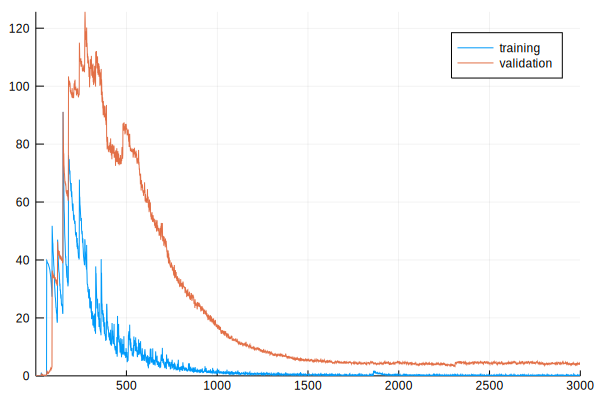

 58.887739 seconds (65.07 M allocations: 5.605 GiB, 2.53% gc time)


Progress: 100%|█████████████████████████████████████████| Time: 17:01:49


In [6]:
datasets = Vector{LearningMPC.Dataset{Float64}}()
all_training_data = Vector{Tuple{Vector{Float64}, Float64, Float64}}()
all_validation_data = Vector{Tuple{Vector{Float64}, Float64, Float64}}()
losses = Vector{Tuple{Float64, Float64}}()

N_iter = 100
σv = 3.0

@showprogress for i in 1:N_iter
    dataset = LearningMPC.Dataset(lqrsol)
    for i in 1:2
        collect_into!(dataset.training_data)
    end
    collect_into!(dataset.testing_data, i / N_iter * σv)
    collect_into!(dataset.validation_data, i / N_iter * σv)
    append!(all_training_data, features.(dataset.training_data))
    append!(all_validation_data, features.(dataset.validation_data))
    filter!(all_training_data) do sample
        all(isfinite, sample[1]) && isfinite(sample[2]) && isfinite(sample[3])
    end
    filter!(all_validation_data) do sample
        all(isfinite, sample[1]) && isfinite(sample[2]) && isfinite(sample[3])
    end
    
    @time for i in 1:30
        Flux.train!(loss, shuffleobs(all_training_data), optimizer)
        push!(losses, 
            (mean(xy -> Flux.Tracker.data(loss(xy...)), 
                  all_training_data),
             mean(xy -> Flux.Tracker.data(loss(xy...)), 
                  all_validation_data)))
    end
    push!(datasets, dataset)
    
    jldopen("boxatlas.jld2", "w") do file
        file["datasets"] = datasets
        file["net"] = net
        file["lqrsol"] = lqrsol
        file["mpc_params"] = Dict(
            "Δt" => params.Δt,
            "horizon" => params.horizon,
        )
        file["all_training_data"] = all_training_data
        file["all_validation_data"] = all_validation_data
        file["losses"] = losses
    end
    
    plt = plot(first.(losses), label="training")
    plot!(plt, last.(losses), label="validation")
    ylims!(plt, (0, ylims(plt)[2]))
    display(plt)
end

In [21]:
x0 = nominal_state(robot)
set_velocity!(x0, findjoint(robot.mechanism, "floating_base"), [-2, 0, 0])
results = LCPSim.simulate(x0, net_mpc_controller, environment(robot), 0.01, 300, params.lcp_solver);

In [24]:
set_configuration!(mvis, configuration(results[1].state))

In [25]:
playback(mvis, results, 0.02)

In [30]:
using Gurobi

In [1]:
full_mpc_controller.params.mip_solver = GurobiSolver(Gurobi.Env(), OutputFlag=0, MIPGap=1e-1)

LoadError: [91mUndefVarError: full_mpc_controller not defined[39m

In [2]:
x0 = nominal_state(robot)
set_velocity!(x0, findjoint(robot.mechanism, "floating_base"), [-2, 0, 0])
results = LCPSim.simulate(x0, full_mpc_controller, environment(robot), 0.05, 60, params.lcp_solver);

LoadError: [91mUndefVarError: nominal_state not defined[39m

In [3]:
set_configuration!(mvis, configuration(results[1].state))

LoadError: [91mUndefVarError: set_configuration! not defined[39m

In [ ]:
playback(mvis, results, 0.02)